In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [5]:
I_org = plt.imread(r'D:\Cursos_Online\computer-vision-beginners\Unit 11\3.jpg')
I = cv.cvtColor(I_org, cv.COLOR_RGB2GRAY)

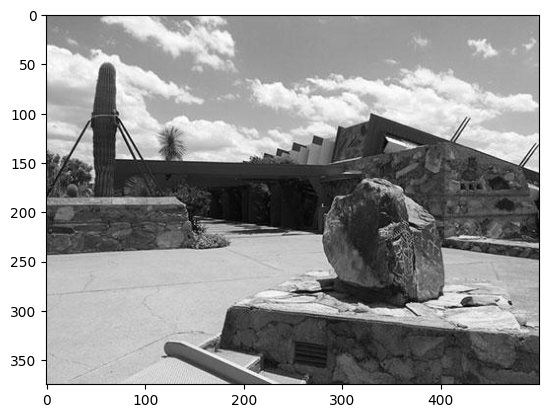

In [6]:
plt.imshow(I, cmap='gray')

In [7]:
numRows, numCols = I.shape[0], I.shape[1]

In [8]:
directions = {
    "left" : (0,-1),
    "right": (0,1),
    "up": (-1,0),
    "down": (1,0),
    'up_left': (-1,-1),
    "up_right": (-1, 1),
    "down_left": (1,-1),
    "down_right": (1,1)
}

In [9]:
C = np.zeros(I.shape)
for i in range(2, numRows-2):
    for j in range(2, numCols-2):
        minSSD = -1
        for d in directions.values():
            u , v = d[0], d[1]
            P1 = I[i-1:i+2,j-1:j+2]
            P2 = I[i+u-1:i+u+2,j+v-1:j+v+2]
            ssd = np.sum((P1-P2)**2)
            if minSSD == -1:
                minSSD = ssd
            elif ssd < minSSD:
                minSSD = ssd
        C[i,j] = minSSD


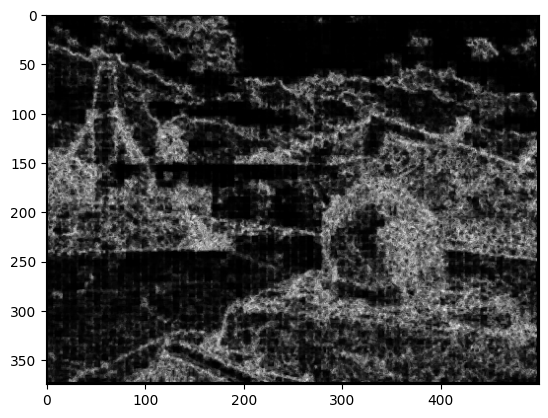

In [10]:
plt.imshow(C, cmap='gray')

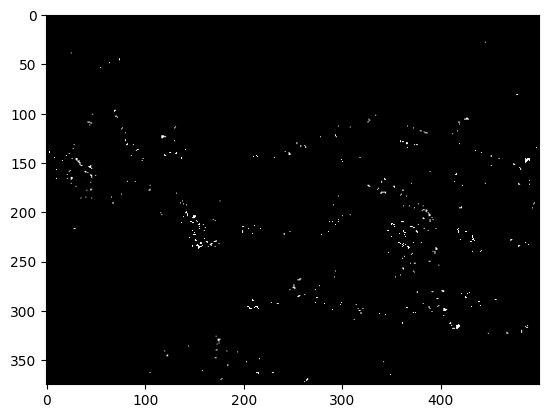

In [11]:
th = C.mean()+3*C.std()
C_image = C > th
plt.imshow(C_image, cmap='gray')

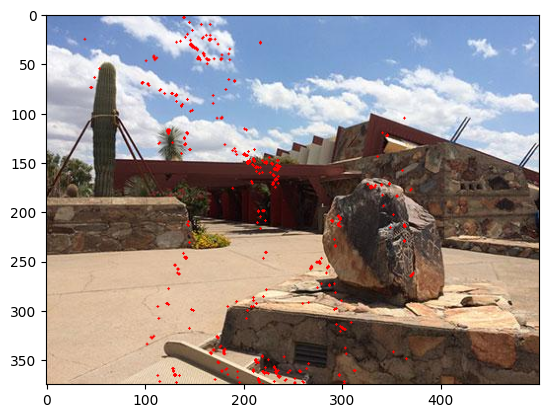

In [12]:
I2 = I_org[:,:,::-1]
idx = np.argwhere(C_image)
r,c = idx[:,0] ,idx[:,1]
for i in range(len(r)):
    I2 = cv.circle(np.float32(I2), (r[i], c[i]), radius=1, color=(0,0,255), thickness=-1)

plt.imshow(np.array(I2[:,:,::-1], np.uint8))

# Harris Corner Detector

In [13]:
I = np.float64(I)
mask_x = np.array([[-1], [1]])
Ix = cv.filter2D(I, -1, mask_x)
Iy = cv.filter2D(I, -1, mask_x.T)
Ix2 , Iy2, IxIy = Ix*Ix, Iy*Iy, Ix*Iy
K = np.ones((3,3))
sIx2 = cv.filter2D(Ix2, -1, K)
sIy2 = cv.filter2D(Iy2, -1, K)
sIxIy = cv.filter2D(IxIy, -1, K)
L1 = ((sIx2+sIy2) + ((sIx2+sIy2)**2 - 4*(IxIy**2))**0.5)/2
L2 = ((sIx2+sIy2) - ((sIx2+sIy2)**2 - 4*(IxIy**2))**0.5)/2

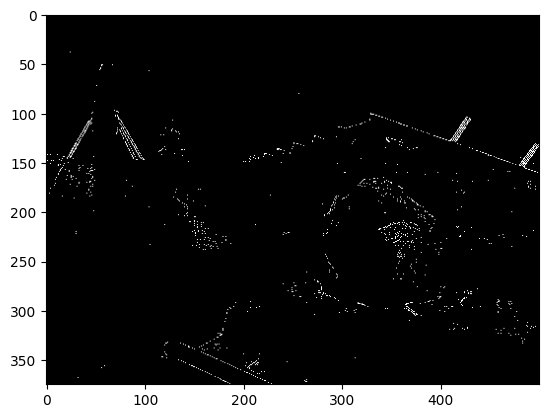

In [14]:
th = L2.mean()+3*L2.std()
C_image = L2 > th
plt.imshow(C_image, cmap='gray')

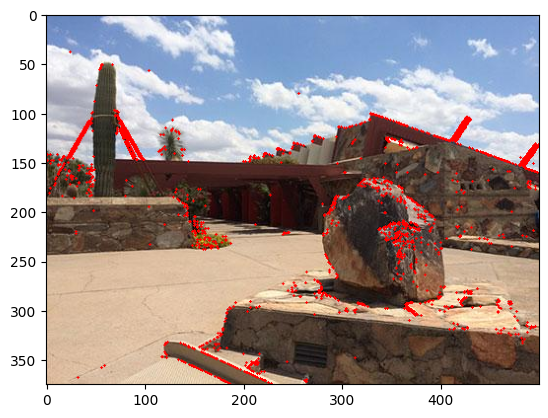

In [15]:
I2 = I_org[:,:,::-1]
idx = np.argwhere(C_image)
r,c = idx[:,0] ,idx[:,1]
for i in range(len(r)):
    I2 = cv.circle(np.float32(I2), (c[i], r[i]), radius=1, color=(0,0,255), thickness=-1)

plt.imshow(np.array(I2[:,:,::-1], np.uint8))